# Phân cụm dựa trên mật độ (Density-Based Clustering)

Thời lượng ước tính: **45** phút

## Mục tiêu

Sau khi hoàn thành lab này, bạn sẽ có thể:

- Sử dụng DBSCAN để thực hiện phân cụm dựa trên mật độ
- Sử dụng Matplotlib để vẽ biểu đồ các cụm


Hầu hết các kỹ thuật phân cụm truyền thống, chẳng hạn như k-means, phân cụm phân cấp (hierarchical) và mờ (fuzzy), có thể được sử dụng để nhóm dữ liệu mà không cần giám sát.

Tuy nhiên, khi áp dụng cho các tác vụ có các cụm hình dạng bất kỳ hoặc các cụm trong cụm, các kỹ thuật truyền thống có thể không đạt được kết quả tốt. Tức là, các phần tử trong cùng một cụm có thể không có cùng độ tương tự hoặc hiệu suất kém.
Ngoài ra, Phân cụm dựa trên mật độ định vị các vùng có mật độ cao phân tách với các vùng có mật độ thấp. Mật độ trong ngữ cảnh này được định nghĩa là số điểm trong một bán kính nhất định.

Trong phần này, trọng tâm chính sẽ là thao tác dữ liệu và thuộc tính của DBSCAN và quan sát kết quả phân cụm.


Import các thư viện sau:

<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>DBSCAN</b> từ <b>sklearn.cluster</b> </li>
    <li> <b>make_blobs</b> từ <b>sklearn.datasets.samples_generator</b> </li>
    <li> <b>StandardScaler</b> từ <b>sklearn.preprocessing</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
</ul> <br>
Hãy nhớ <b>%matplotlib inline</b> để hiển thị các biểu đồ


In [1]:
# Cài đặt thư viện basemap để phục vụ cho bài lab
# Lưu ý: 
#     1. Nếu bạn thiết lập mỗi trường conda hãy đoạn code thứ nhất
#     2. Nếu bạn không thiết lập môi trường với anaconda hoặc sử dụng google colab hãy chạy đoạn code thứ hai
#     3. Sau khi cài đặt hãy restart runtime của notebook

!conda install -c conda-forge basemap matplotlib==3.1 -y
#!pip install basemap matplotlib==3.1

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - matplotlib==3.1
  - basemap

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-arm64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [8]:
!pip3 show matplotlib

Name: matplotlib
Version: 3.4.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/chinguyen/miniforge3/envs/tensorflow/lib/python3.9/site-packages
Requires: cycler, kiwisolver, numpy, pillow, pyparsing, python-dateutil
Required-by: missingno, mplfinance, seaborn, wordcloud


In [2]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### Khởi tạo dữ liệu

Hàm bên dưới sẽ tạo ra các điểm dữ liệu và yêu cầu các input sau:

<ul>
    <li> <b>centroidLocation</b>: Tọa độ của các trọng tâm sẽ tạo ra dữ liệu ngẫu nhiên. </li>
    <ul> <li> Ví dụ: nhập: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: Số lượng điểm dữ liệu mà chúng ta muốn tạo ra, chia trên số lượng trọng tâm (số lượng trọng tâm được xác định trong centroidLocation) </li>
    <ul> <li> Ví dụ: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: Độ lệch chuẩn giữa các cụm. Độ lệch càng lớn thì khoảng cách càng xa. </li>
    <ul> <li> Ví dụ: 0.5 </li> </ul>
</ul>


In [3]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

Sử dụng <b>createDataPoints</b> với <b>3 input</b> và lưu trữ output vào các biến <b>X</b> và <b>y</b>.

In [4]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### Mô hình hóa

DBSCAN là viết tắt của cụm từ Phân cụm không gian dựa trên mật độ của các ứng dụng có độ nhiễu. Kỹ thuật này là một trong những thuật toán phân cụm phổ biến nhất hoạt động dựa trên mật độ của đối tượng.
Ý tưởng là nếu một điểm cụ thể thuộc về một cụm, thì nó sẽ gần với rất nhiều điểm khác trong cụm đó.

Nó hoạt động dựa trên 2 tham số: Epsilon và Minimum Points

**Epsilon** xác định bán kính xác định mà nếu bao gồm đủ số điểm bên trong, ta gọi nó là dense area  
**minimumSamples** xác định số lượng điểm dữ liệu tối thiểu mà chúng ta muốn trong một vùng lân cận để xác định một cụm.


In [5]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 1, ..., 0, 1, 0])

### Phân biệt các ngoại lệ

Hãy thay thế tất cả các phần tử bằng 'True' trong core_samples_mask nằm trong cụm, 'False' nếu các điểm là ngoại lệ.


In [6]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [7]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [8]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

### Trực quan hóa Dữ liệu


In [9]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


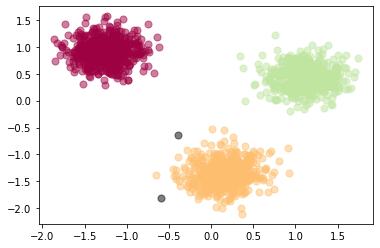

In [10]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

## Thực hành

Để hiểu sự khác biệt giữa phân cụm theo từng phần và dựa trên mật độ, hãy cố gắng phân cụm tập dữ liệu trên thành 3 cụm sử dụng k-Means.
Lưu ý: không tạo lại dữ liệu, sử dụng cùng một tập dữ liệu như trên.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


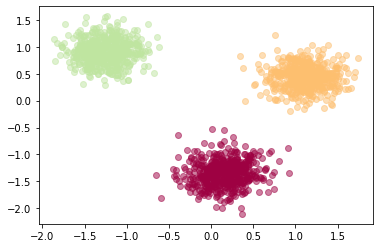

In [11]:
# Nhập code của bạn ở đây
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

<details><summary>Click vào đây để xem lời giải</summary>

```python
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

```

</details>


<h1 align=center> Phân cụm trạm thời tiết sử dụng DBSCAN & scikit-learning</h1>
<hr>

DBSCAN đặc biệt rất tốt cho các tác vụ như xác định lớp trên bối cảnh không gian. Thuộc tính tuyệt vời của thuật toán DBSCAN là nó có thể tìm ra bất kỳ cụm hình dạng tùy ý nào mà không bị ảnh hưởng bởi noise (nhiễu). Ví dụ sau đây phân cụm vị trí của các trạm thời tiết ở Canada.
<Click 1>
Ví dụ, DBSCAN có thể được sử dụng ở đây để tìm nhóm các trạm có cùng điều kiện thời tiết. Như bạn có thể thấy, nó không chỉ tìm thấy các cụm có hình dạng tùy ý khác nhau mà còn có thể tìm thấy phần dày đặc hơn của các mẫu lấy dữ liệu làm trọng tâm bằng cách bỏ qua các khu vực ít mật độ hơn hoặc ít ồn hơn.

Hãy bắt đầu xử lý dữ liệu. Chúng ta sẽ làm việc theo quy trình sau: </font>

1.  Load dữ liệu

- Tổng quan dữ liệu
- Làm sạch dữ liệu (data cleaning)
- Lựa chọn dữ liệu
- Phân cụm


### Về tập dữ liệu

<h4 align = "center">
Giá trị môi trường Canada
hàng tháng trong tháng 7 - 2015
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>

</head>
<body>

<table>
  <tr>
    <th>Ký hiệu trong bảng</th>
    <th>Định nghĩa</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>

</table>

</body>
</html>


### 1. Load tập dữ liệu

Chúng ta sẽ nhập .csv sau đó tạo các cột cho năm, tháng và ngày.


In [12]:
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### 2. Làm sạch dữ liệu 

Hãy loại bỏ các hàng không có bất kỳ giá trị nào trong trường **Tm**.


In [13]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


### 3. Trực quan hóa

Trực quan hóa các trạm trên bản đồ bằng gói basemap. Bộ công cụ basemap của matplotlib là một thư viện để vẽ trên bản đồ dữ liệu 2D trong Python. Basemap không tự thực hiện bất kỳ biểu đồ nào nhưng cung cấp các phương tiện để chuyển đổi tọa độ thành phép chiếu bản đồ.

Vui lòng lưu ý rằng kích thước của mỗi điểm dữ liệu đại diện cho mức trung bình của nhiệt độ tối đa cho mỗi trạm trong một năm.


In [18]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

### 4. Nhóm các trạm dựa trên vị trí của chúng, tức là Vĩ độ và Kinh độ

**DBSCAN** của thư viện sklearn có thể chạy phân cụm DBSCAN từ mảng vectơ hoặc ma trận khoảng cách. Trong trường hợp này, hãy truyền nó vào mảng Numpy Clus_dataSet để tìm các mẫu lõi có mật độ cao và mở rộng các cụm từ chúng.

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Như bạn có thể thấy đối với các ngoại lai, nhãn cụm là -1


In [ ]:
set(labels)

### 5. Trực quan hóa các cụm dựa trên vị trí

Bây giờ, chúng ta có thể trực quan hóa các cụm bằng basemap:


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

### 6. Phân nhóm các trạm dựa trên vị trí, nhiệt độ trung bình, nhiệt độ tối đa và tối thiểu

Trong phần này, chúng ta chạy lại DBSCAN, nhưng trên tập dữ liệu 5 chiều:


In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

### 7. Trực quan hóa các cụm dựa trên vị trí và nhiệt độ


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

### Cảm ơn bạn đã hoàn thành lab này!

Nguồn bài Lab: **IBM**